In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

mcn_lightblue = '#0085ca'
mcn_yellow = '#ffc000'
mcn_navy = '#002d72'

In [2]:
preds = pd.read_table("predictions_r_first_round.csv", index_col=0, sep=',')
preds

,rep_id,CRE_id,CRE_class,cell_type,umis_obc,shendure_umis_mbc,zinb,nb,pm,zip
1,2B1,Btg1_chr10_9572,devCRE,Neuroectoderm (brain),67,0,0.006904,-4.975608,-4.393134,0.013176
2,2B1,Gata4_chr14_5710,devCRE,Neuroectoderm (brain),159,0,0.006891,-4.977537,-4.500792,0.011484
3,2B1,Klf4_chr4_3952,devCRE,Neuroectoderm (brain),89,0,0.018519,-3.988979,-3.483468,0.034442
4,2B1,Lama1_chr17_7793,devCRE,Neuroectoderm (brain),147,0,0.103874,-2.264571,-1.843257,0.206667
5,2B1,Sox17_chr1_67,devCRE,Neuroectoderm (brain),58,0,0.049138,-3.013114,-2.552878,0.086737
...,...,...,...,...,...,...,...,...,...,...
778244,B2,Sparc_chr11_7207,devCRE,Ex. Endoderm (visceral),104,0,0.019795,-3.922328,-3.666372,0.029164
778245,B2,Tgfbi_chr13_5735,devCRE,Ex. Endoderm (visceral),98,0,0.045609,-3.087647,-2.831790,0.070976
778246,B2,Tgfbi_chr13_5741,devCRE,Ex. Endoderm (visceral),68,1,2.359771,0.858566,0.948886,1.609839
778247,B2,noP,promoters,Ex. Endoderm (visceral),166,0,0.068529,-2.680498,-2.316487,0.122025


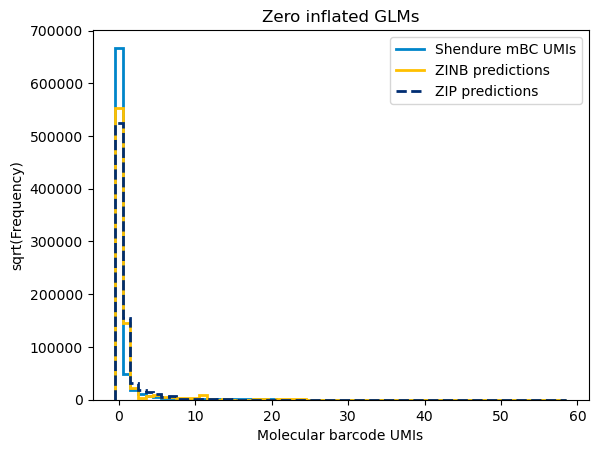

In [3]:
bins = np.arange(60) - 0.5
plt.hist(np.sqrt(preds['shendure_umis_mbc']), bins=bins, histtype='step', color = mcn_lightblue, linewidth=2)
plt.hist(np.sqrt(preds['zinb']), bins=bins, histtype='step', color = mcn_yellow, linewidth=2, linestyle='-')
plt.hist(np.sqrt(preds['zip']), bins=bins, histtype='step', color = mcn_navy, linewidth=2, linestyle='--')
#plt.xticks(range(20))
#plt.xlim([-1, 20])
#plt.ylim([0,400000])

plt.title('Zero inflated GLMs')
plt.xlabel('Molecular barcode UMIs')
plt.ylabel('sqrt(Frequency)')

colors = ['#0085ca', '#ffc000', '#002d72']
styles = ['-', '-', '--']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle=s) for c,s in zip(colors, styles)]
labels = ['Shendure mBC UMIs', 'ZINB predictions', 'ZIP predictions']
plt.legend(lines, labels)
plt.savefig('real_zeroinfl_dist.svg')
plt.show()

/home/eng26/.conda/envs/scmpra/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


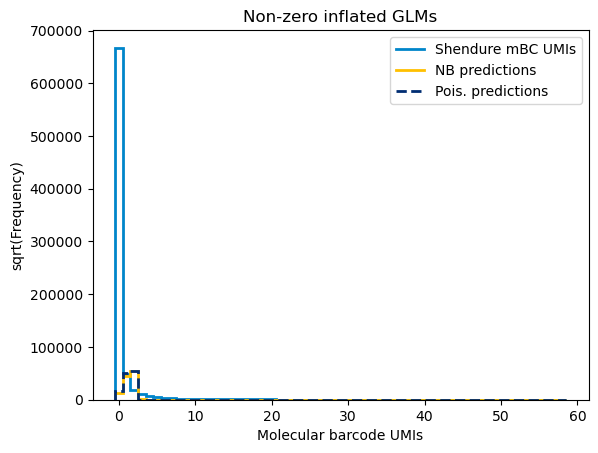

In [4]:
bins = np.arange(60) - 0.5
plt.hist(np.sqrt(preds['shendure_umis_mbc']), bins=bins, histtype='step', color = mcn_lightblue, linewidth=2)
plt.hist(np.sqrt(preds['nb']), bins=bins, histtype='step', color = mcn_yellow, linewidth=2, linestyle='-')
plt.hist(np.sqrt(preds['pm']), bins=bins, histtype='step', color = mcn_navy, linewidth=2, linestyle='--')
#plt.xticks(range(20))
#plt.xlim([-1, 20])
#plt.ylim([0,400000])
plt.title('Non-zero inflated GLMs')
plt.xlabel('Molecular barcode UMIs')
plt.ylabel('sqrt(Frequency)')

colors = ['#0085ca', '#ffc000', '#002d72']
styles = ['-', '-', '--']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle=s) for c,s in zip(colors, styles)]
labels = ['Shendure mBC UMIs', 'NB predictions', 'Pois. predictions']
plt.legend(lines, labels)
plt.savefig('real_noninfl_dist.svg')
plt.show()

In [5]:
preds

,rep_id,CRE_id,CRE_class,cell_type,umis_obc,shendure_umis_mbc,zinb,nb,pm,zip
1,2B1,Btg1_chr10_9572,devCRE,Neuroectoderm (brain),67,0,0.006904,-4.975608,-4.393134,0.013176
2,2B1,Gata4_chr14_5710,devCRE,Neuroectoderm (brain),159,0,0.006891,-4.977537,-4.500792,0.011484
3,2B1,Klf4_chr4_3952,devCRE,Neuroectoderm (brain),89,0,0.018519,-3.988979,-3.483468,0.034442
4,2B1,Lama1_chr17_7793,devCRE,Neuroectoderm (brain),147,0,0.103874,-2.264571,-1.843257,0.206667
5,2B1,Sox17_chr1_67,devCRE,Neuroectoderm (brain),58,0,0.049138,-3.013114,-2.552878,0.086737
...,...,...,...,...,...,...,...,...,...,...
778244,B2,Sparc_chr11_7207,devCRE,Ex. Endoderm (visceral),104,0,0.019795,-3.922328,-3.666372,0.029164
778245,B2,Tgfbi_chr13_5735,devCRE,Ex. Endoderm (visceral),98,0,0.045609,-3.087647,-2.831790,0.070976
778246,B2,Tgfbi_chr13_5741,devCRE,Ex. Endoderm (visceral),68,1,2.359771,0.858566,0.948886,1.609839
778247,B2,noP,promoters,Ex. Endoderm (visceral),166,0,0.068529,-2.680498,-2.316487,0.122025


In [6]:
preds.CRE_id.unique().shape

(212,)

In [7]:
preds.shendure_umis_mbc - preds.zinb 

1         -0.006904
2         -0.006891
3         -0.018519
4         -0.103874
5         -0.049138
            ...    
778244    -0.019795
778245    -0.045609
778246    -1.359771
778247    -0.068529
778248   -48.078818
Length: 778248, dtype: float64

In [8]:
preds['zinb_res'] = preds.shendure_umis_mbc - preds.zinb 
preds['zip_res'] = preds.shendure_umis_mbc - preds.zip
preds['nb_res'] = preds.shendure_umis_mbc - preds.nb 
preds['pm_res'] = preds.shendure_umis_mbc - preds.pm 

preds['shendure_umis_mbc_no_zeros'] = preds['shendure_umis_mbc'].replace(0,1,inplace=False)

preds['zinb_resnorm'] = preds.zinb_res /  preds.shendure_umis_mbc_no_zeros
preds['zip_resnorm'] = preds.zip_res /  preds.shendure_umis_mbc_no_zeros
preds['nb_resnorm'] = preds.nb_res /  preds.shendure_umis_mbc_no_zeros
preds['pm_resnorm'] = preds.pm_res /  preds.shendure_umis_mbc_no_zeros

In [9]:
preds

,rep_id,CRE_id,CRE_class,cell_type,umis_obc,shendure_umis_mbc,zinb,nb,pm,zip,zinb_res,zip_res,nb_res,pm_res,shendure_umis_mbc_no_zeros,zinb_resnorm,zip_resnorm,nb_resnorm,pm_resnorm
1,2B1,Btg1_chr10_9572,devCRE,Neuroectoderm (brain),67,0,0.006904,-4.975608,-4.393134,0.013176,-0.006904,-0.013176,4.975608,4.393134,1,-0.006904,-0.013176,4.975608,4.393134
2,2B1,Gata4_chr14_5710,devCRE,Neuroectoderm (brain),159,0,0.006891,-4.977537,-4.500792,0.011484,-0.006891,-0.011484,4.977537,4.500792,1,-0.006891,-0.011484,4.977537,4.500792
3,2B1,Klf4_chr4_3952,devCRE,Neuroectoderm (brain),89,0,0.018519,-3.988979,-3.483468,0.034442,-0.018519,-0.034442,3.988979,3.483468,1,-0.018519,-0.034442,3.988979,3.483468
4,2B1,Lama1_chr17_7793,devCRE,Neuroectoderm (brain),147,0,0.103874,-2.264571,-1.843257,0.206667,-0.103874,-0.206667,2.264571,1.843257,1,-0.103874,-0.206667,2.264571,1.843257
5,2B1,Sox17_chr1_67,devCRE,Neuroectoderm (brain),58,0,0.049138,-3.013114,-2.552878,0.086737,-0.049138,-0.086737,3.013114,2.552878,1,-0.049138,-0.086737,3.013114,2.552878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778244,B2,Sparc_chr11_7207,devCRE,Ex. Endoderm (visceral),104,0,0.019795,-3.922328,-3.666372,0.029164,-0.019795,-0.029164,3.922328,3.666372,1,-0.019795,-0.029164,3.922328,3.666372
778245,B2,Tgfbi_chr13_5735,devCRE,Ex. Endoderm (visceral),98,0,0.045609,-3.087647,-2.831790,0.070976,-0.045609,-0.070976,3.087647,2.831790,1,-0.045609,-0.070976,3.087647,2.831790
778246,B2,Tgfbi_chr13_5741,devCRE,Ex. Endoderm (visceral),68,1,2.359771,0.858566,0.948886,1.609839,-1.359771,-0.609839,0.141434,0.051114,1,-1.359771,-0.609839,0.141434,0.051114
778247,B2,noP,promoters,Ex. Endoderm (visceral),166,0,0.068529,-2.680498,-2.316487,0.122025,-0.068529,-0.122025,2.680498,2.316487,1,-0.068529,-0.122025,2.680498,2.316487


In [10]:
cres = list(preds.CRE_id.unique())

In [11]:
mean_abs = preds.groupby(['CRE_id'])['zinb_res'].apply(lambda x: np.mean(np.abs(x))).sort_values(ascending=True)


In [12]:
preds.groupby(['CRE_id'])['shendure_umis_mbc'].sum()['eef1aP']


2946499

In [13]:
mean_abs[:50].index

Index(['Col1a1_chr11_15306', 'Col1a2_chr6_65', 'Sox17_chr1_83',
       'Lamb1_chr12_2206', 'Lama1_chr17_7892', 'Col5a1_chr2_2586',
       'Gata4_chr14_5762', 'Col1a2_chr6_88', 'Lamc1_chr1_12183',
       'Foxa2_chr2_13806', 'Sox17_chr1_59', 'minP_w_20bp_buffer',
       'Foxa2_chr2_13861', 'Lamb1_chr12_2288', 'Cdk5r1_chr11_12595',
       'Bend5_chr4_8192', 'Gata4_chr14_5710', 'Lama1_chr17_7907',
       'Sox17_chr1_78', 'Lamb1_chr12_2203', 'Sparc_chr11_7180',
       'Foxa2_chr2_13830', 'Col5a1_chr2_2562', 'Btg1_chr10_9572',
       'Btg1_chr10_9588', 'Lamb1_chr12_2182', 'Sparc_chr11_7182',
       'Bend5_chr4_8172', 'Sox4_chr13_2057', 'Lamc1_chr1_12127',
       'Sparc_chr11_7233', 'Col5a1_chr2_2558', 'Cited2_chr10_1248',
       'Gata4_chr14_5763', 'Lama1_chr17_7787', 'Sox4_chr13_2054',
       'Sparc_chr11_7199', 'Txndc12_chr4_7975', 'Lamb1_chr12_2207',
       'Epas1_chr17_10056', 'Sparc_chr11_7198', 'Cited2_chr10_1267',
       'Gata4_chr14_5779', 'Col1a1_chr11_15269', 'Bend5_chr4_8168',
   

In [14]:
cres[50:100]

['Tubb2b_chr13_2577',
 'Tubb2b_chr13_2580',
 'Tubb2b_chr13_2590',
 'Txndc12_chr4_7951',
 'Txndc12_chr4_7975',
 'Txndc12_chr4_7978',
 'eef1aP',
 'noP',
 'pgk1P',
 'ubcP',
 'Bend5_chr4_8174',
 'Cited2_chr10_1267',
 'Col1a1_chr11_15307',
 'Gata4_chr14_5742',
 'Igfbp4_chr11_16738',
 'Lama1_chr17_7784',
 'Lama1_chr17_7787',
 'Lamb1_chr12_2289',
 'Lamc1_chr1_12185',
 'Map1b_chr13_9436',
 'Sox17_chr1_77',
 'Sox17_chr1_83',
 'Tubb2b_chr13_2557',
 'Tubb2b_chr13_2568',
 'Epas1_chr17_10061',
 'Lamb1_chr12_2288',
 'Tubb2b_chr13_2583',
 'Cdk5r1_chr11_12575',
 'Col1a1_chr11_15276',
 'Col1a2_chr6_73',
 'Col1a2_chr6_88',
 'Col5a1_chr2_2562',
 'Epas1_chr17_10116',
 'Foxa2_chr2_13835',
 'Gata4_chr14_5729',
 'Igfbp4_chr11_16784',
 'Lamc1_chr1_12193',
 'Sox17_chr1_59',
 'Sox17_chr1_60',
 'Sox2_chr3_2007',
 'Sox4_chr13_2055',
 'Sparc_chr11_7195',
 'Tgfbi_chr13_5741',
 'Tubb2b_chr13_2576',
 'Btg1_chr10_9593',
 'Cdk5r1_chr11_12562',
 'Cdk5r1_chr11_12595',
 'Col1a1_chr11_15270',
 'Col1a1_chr11_15301',
 'Col1a

In [15]:
mean_abs[:50]

CRE_id
Col1a1_chr11_15306    0.000009
Col1a2_chr6_65        0.000011
Sox17_chr1_83         0.013710
Lamb1_chr12_2206      0.015780
Lama1_chr17_7892      0.016876
Col5a1_chr2_2586      0.021267
Gata4_chr14_5762      0.022088
Col1a2_chr6_88        0.022350
Lamc1_chr1_12183      0.022434
Foxa2_chr2_13806      0.023033
Sox17_chr1_59         0.023498
minP_w_20bp_buffer    0.023784
Foxa2_chr2_13861      0.024523
Lamb1_chr12_2288      0.024768
Cdk5r1_chr11_12595    0.024940
Bend5_chr4_8192       0.025851
Gata4_chr14_5710      0.026744
Lama1_chr17_7907      0.027757
Sox17_chr1_78         0.028657
Lamb1_chr12_2203      0.029065
Sparc_chr11_7180      0.029701
Foxa2_chr2_13830      0.030066
Col5a1_chr2_2562      0.030195
Btg1_chr10_9572       0.030792
Btg1_chr10_9588       0.031074
Lamb1_chr12_2182      0.031435
Sparc_chr11_7182      0.033311
Bend5_chr4_8172       0.033505
Sox4_chr13_2057       0.033713
Lamc1_chr1_12127      0.034864
Sparc_chr11_7233      0.035898
Col5a1_chr2_2558      0.037392
C

In [16]:
mean_abs.shape

(212,)

In [17]:
def subplots_cre(suptitle, ylab, xlab, meany, y, outliers):
    fig, axs = plt.subplots(5,1, figsize=(30,40))
    fig.suptitle(suptitle)
    fig.subplots_adjust(hspace=1)

    counter = 0
    for ax in axs:
        ax.tick_params(axis='x', rotation=90)
        ax.set_ylabel(ylab)
        ax.set_xlabel(xlab)
        sns.boxplot(data = preds[preds.CRE_id.isin(mean_abs[counter:counter+50].index)], x = 'CRE_id', y = y, order = mean_abs[counter:counter+50].index, ax=ax, showfliers=outliers, color = mcn_lightblue)
        ax.axhline(y = meany, color = mcn_yellow, linestyle = '--')
        if counter == 200:
            ax.set_title("%s-%s" % (str(counter+1), str(213)))
        
        else:
            ax.set_title("%s-%s" % (str(counter+1), str(counter+50)))
        counter += 50

    return counter


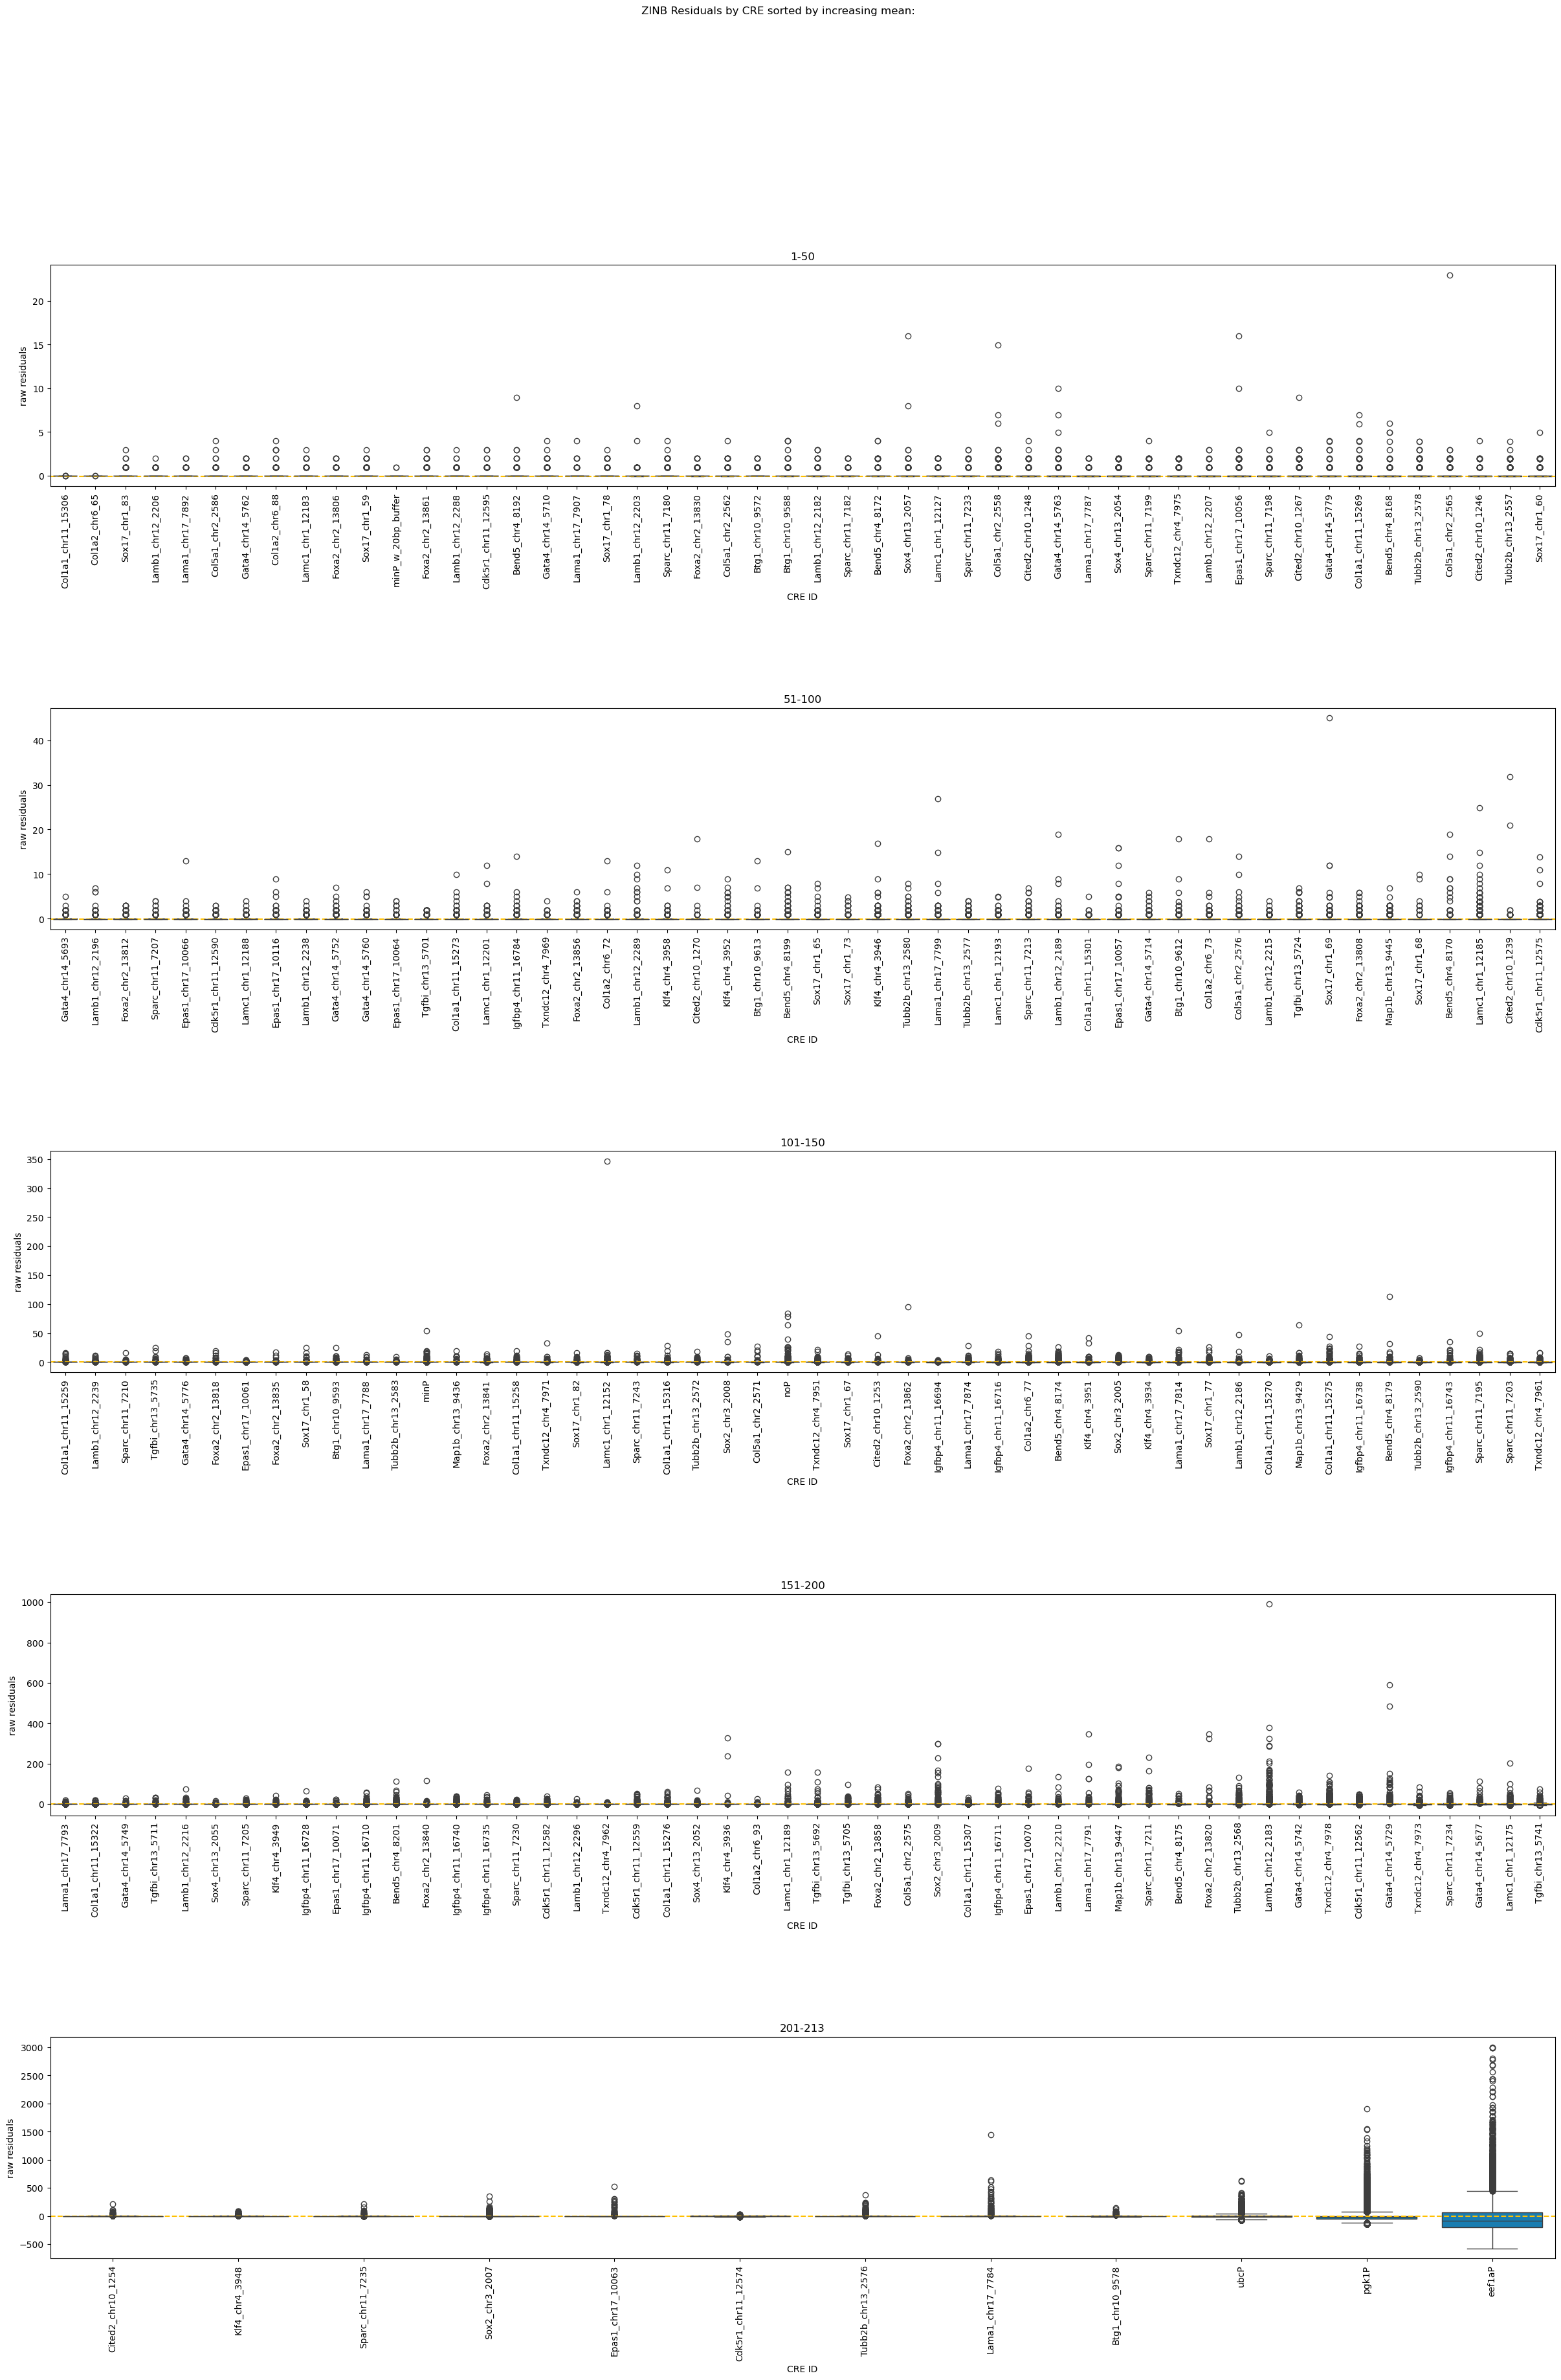

In [18]:
st = 'ZINB Residuals by CRE sorted by increasing mean:'
yl = 'raw residuals'
xl = 'CRE ID'
my = -0.0519225809675359
y = 'zinb_res'
o = True
c = subplots_cre(st, yl, xl, my, y, o)

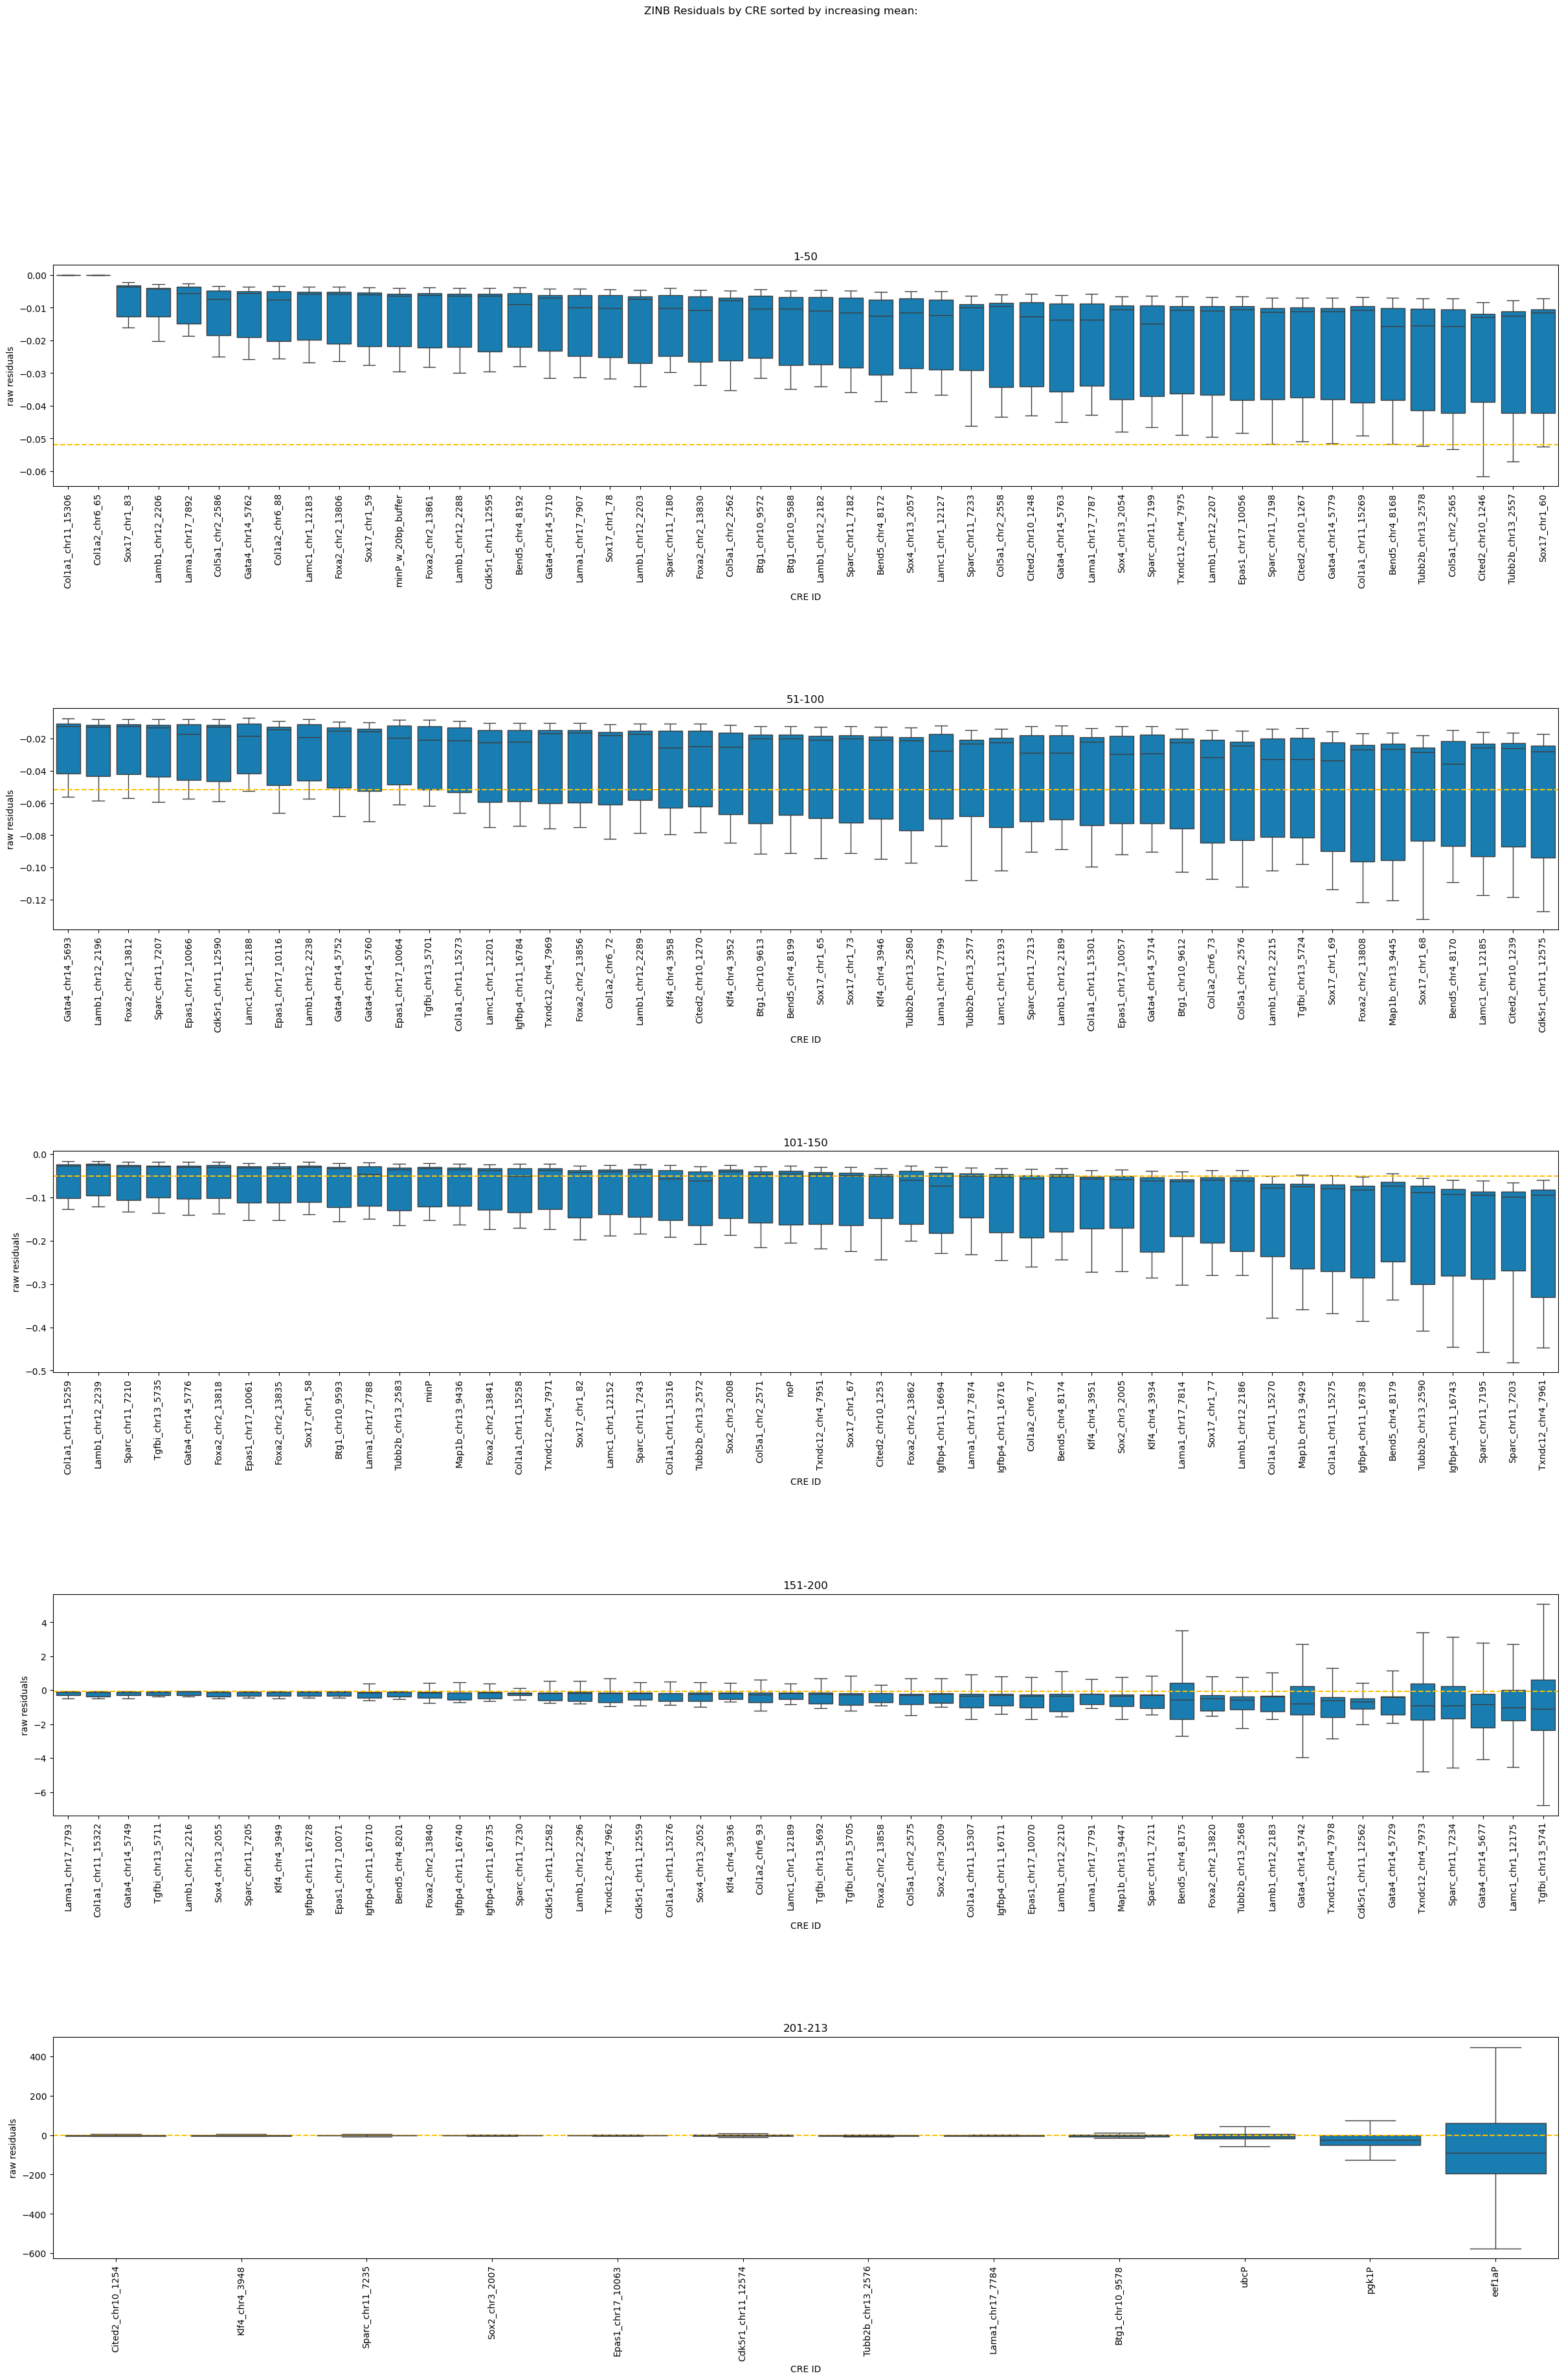

In [19]:
st = 'ZINB Residuals by CRE sorted by increasing mean:'
yl = 'raw residuals'
xl = 'CRE ID'
my = -0.0519225809675359
y = 'zinb_res'
o = False
c = subplots_cre(st, yl, xl, my, y, o)

<Axes: xlabel='zinb_res', ylabel='Count'>

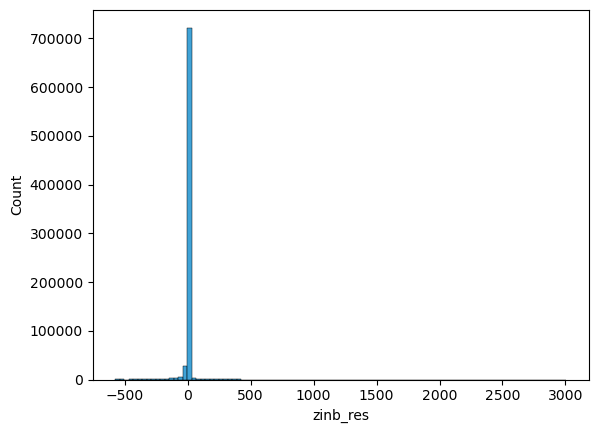

In [20]:
sns.histplot(data=preds, x = 'zinb_res', bins = 100, color = mcn_lightblue)

(0.0, 6000.0)

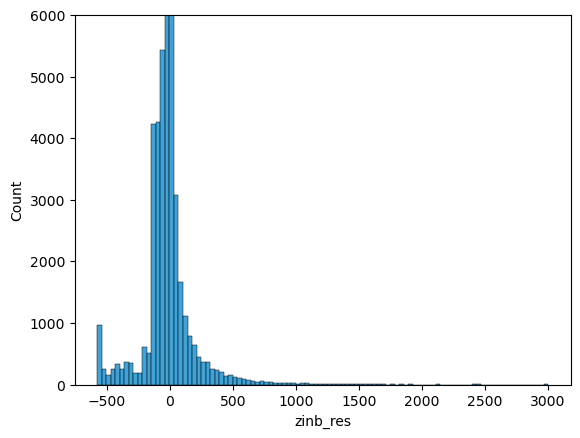

In [21]:
sns.histplot(data=preds, x = 'zinb_res', bins = 100, color = mcn_lightblue)
plt.ylim(0,6000)

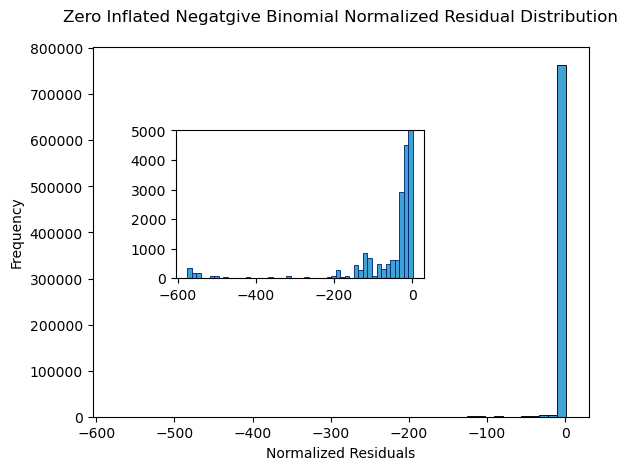

In [22]:
fig, ax = plt.subplots()
plt.title('Zero Inflated Negatgive Binomial Normalized Residual Distribution\n')
sns.histplot(data=preds, x = 'zinb_resnorm', bins = 50, color = mcn_lightblue)
plt.xlabel('Normalized Residuals')
plt.ylabel('Frequency')

axins = inset_axes(ax,  "50%", "40%" ,loc="upper left", borderpad=6)
sns.histplot(data=preds, x = 'zinb_resnorm', bins = 50, color = mcn_lightblue, ax = axins, edgecolor= mcn_navy)
plt.ylim(0,5000)
plt.xlabel('')
plt.ylabel('')
plt.savefig("zinb_normed_residuals_hist.svg")


(0.0, 6000.0)

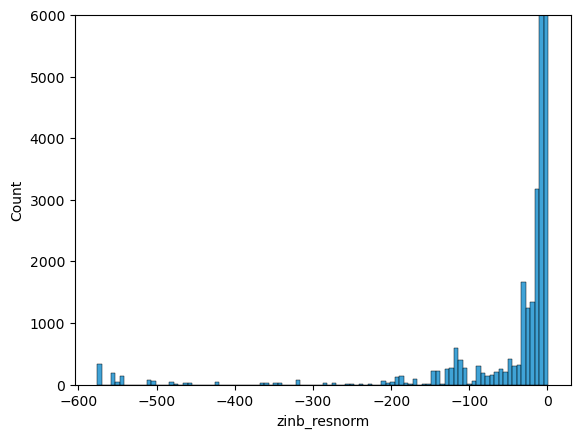

In [33]:
sns.histplot(data=preds, x = 'zinb_resnorm', bins = 100, color = mcn_lightblue)
plt.ylim(0,6000)

In [90]:
preds.zinb_resnorm.describe()

count    778248.000000
mean         -1.883547
std          21.875499
min        -575.900944
25%          -0.194398
50%          -0.051326
75%          -0.017236
max           0.999541
Name: zinb_resnorm, dtype: float64

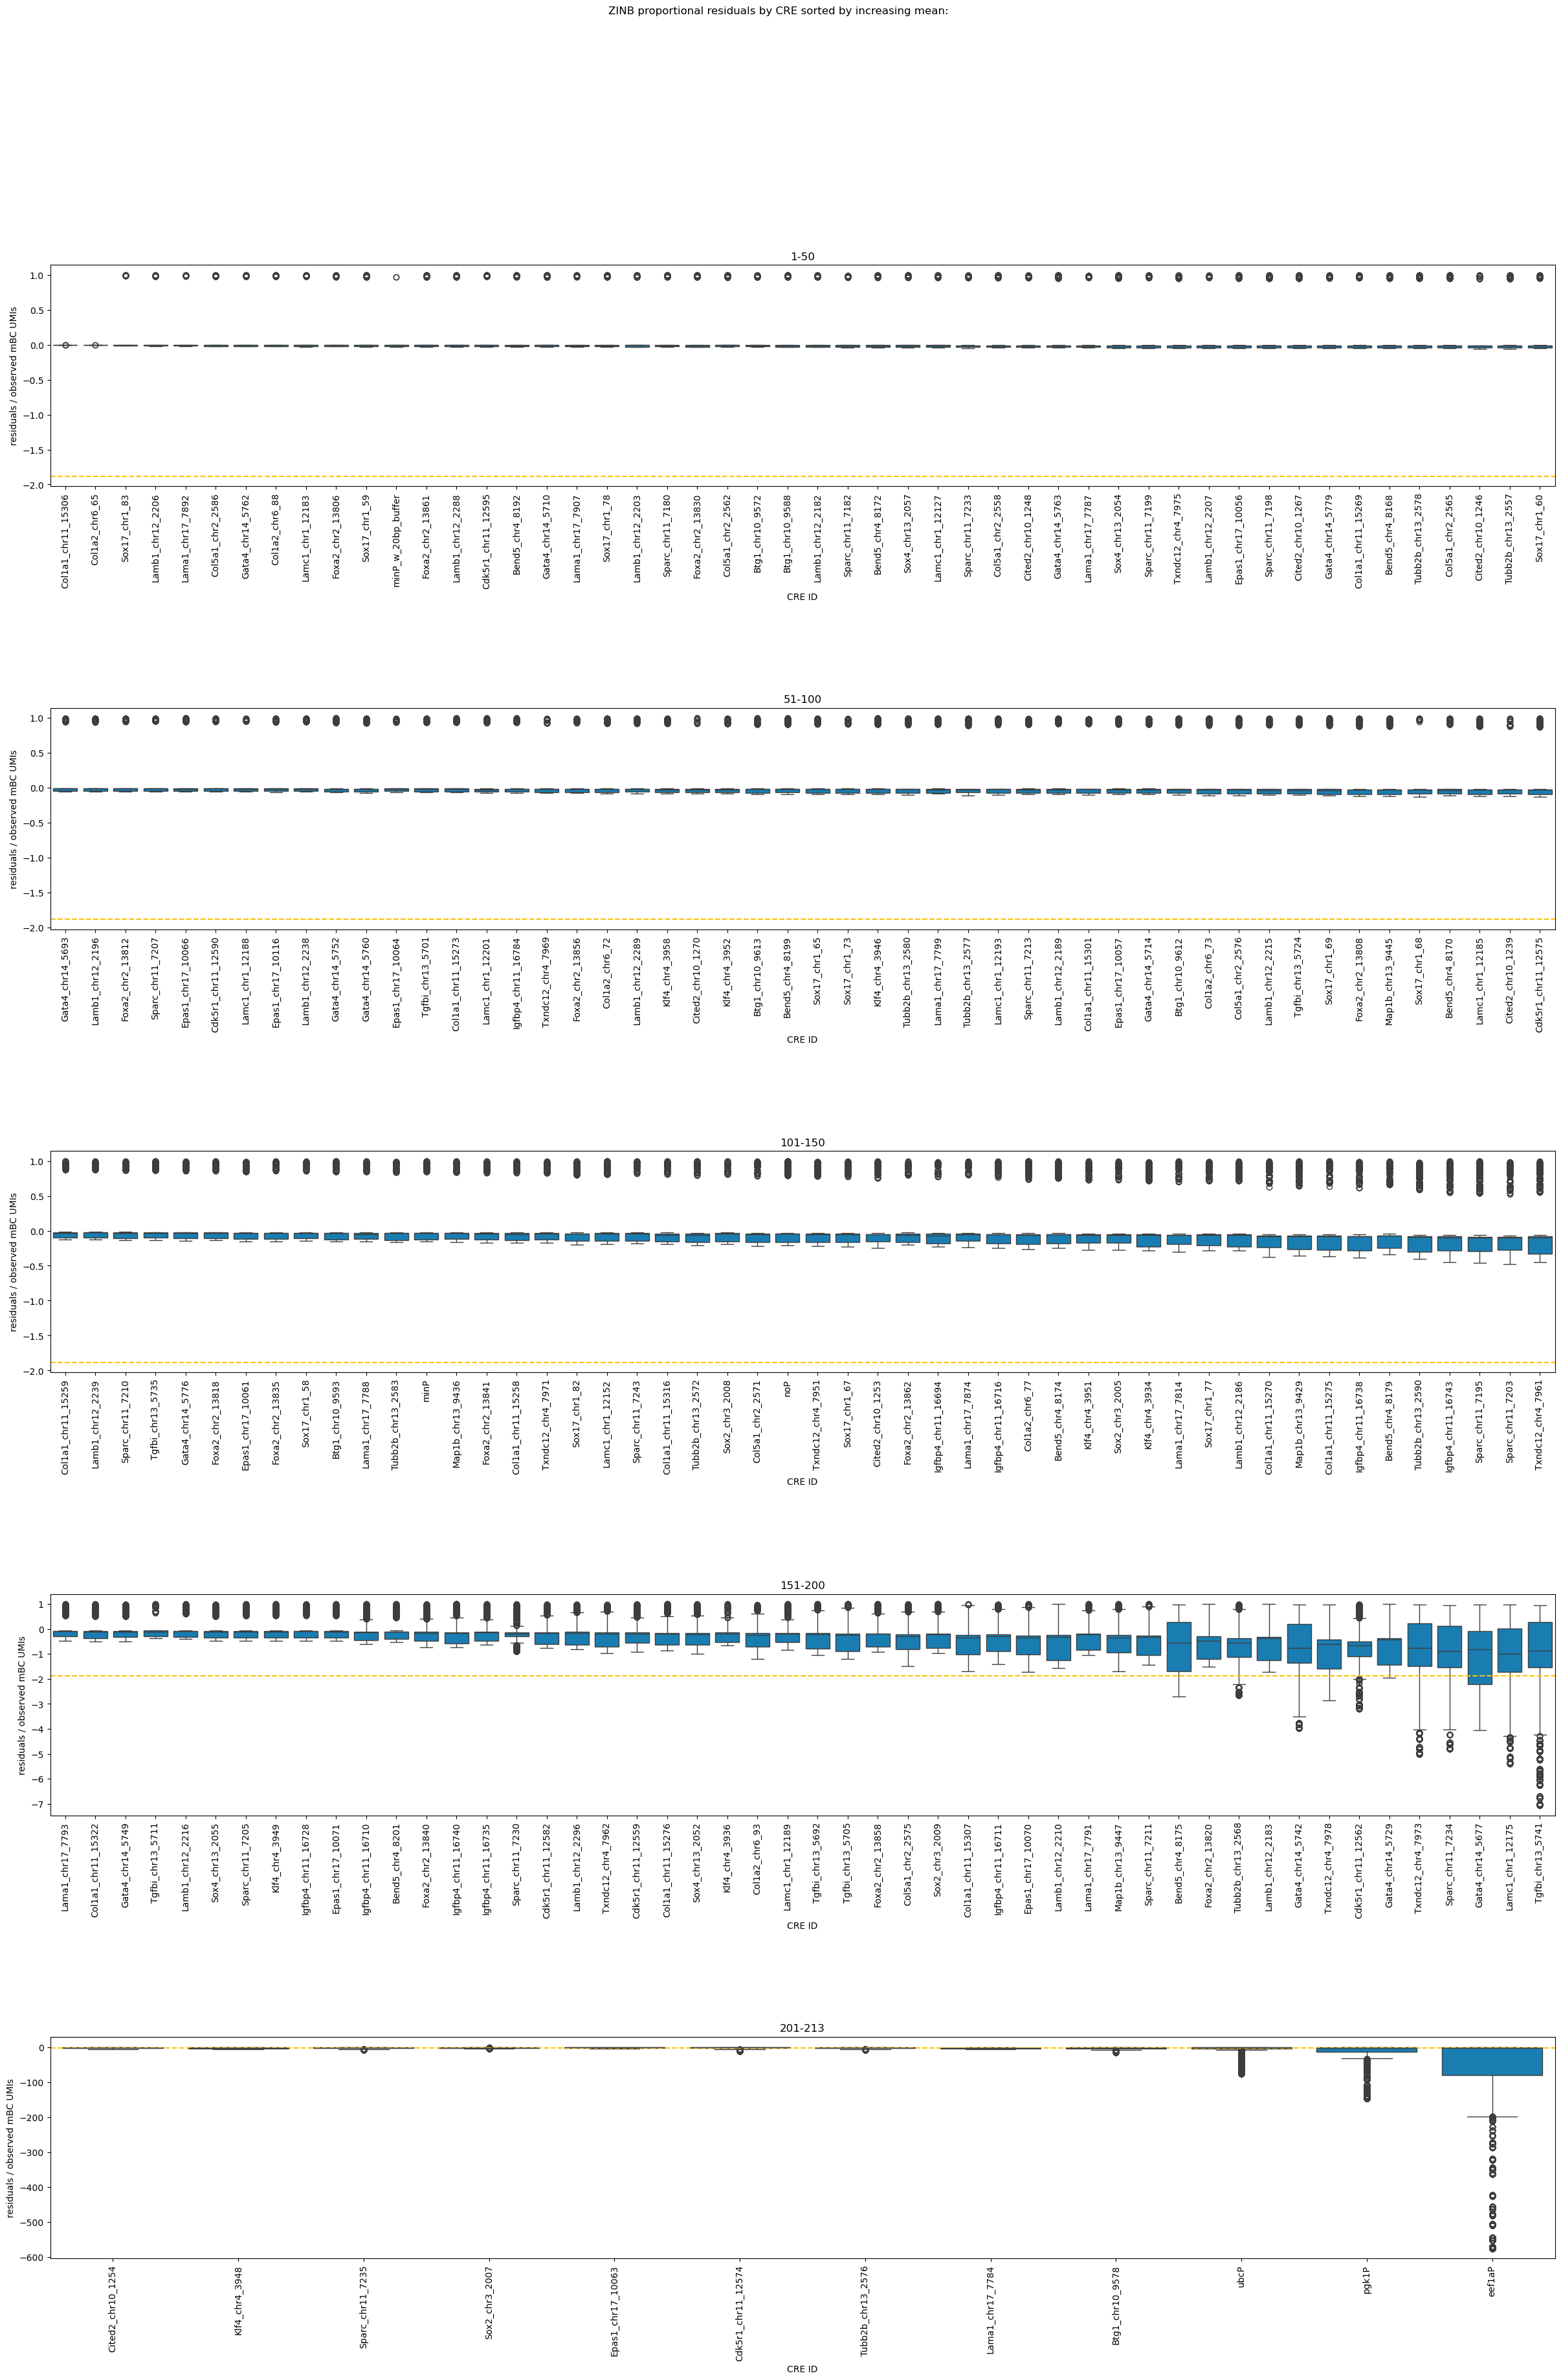

In [55]:
st = 'ZINB proportional residuals by CRE sorted by increasing mean:'
yl = 'residuals / observed mBC UMIs'
xl = 'CRE ID'
my = -1.883547
y = 'zinb_resnorm'
o = True
c = subplots_cre(st, yl, xl, my, y, o)

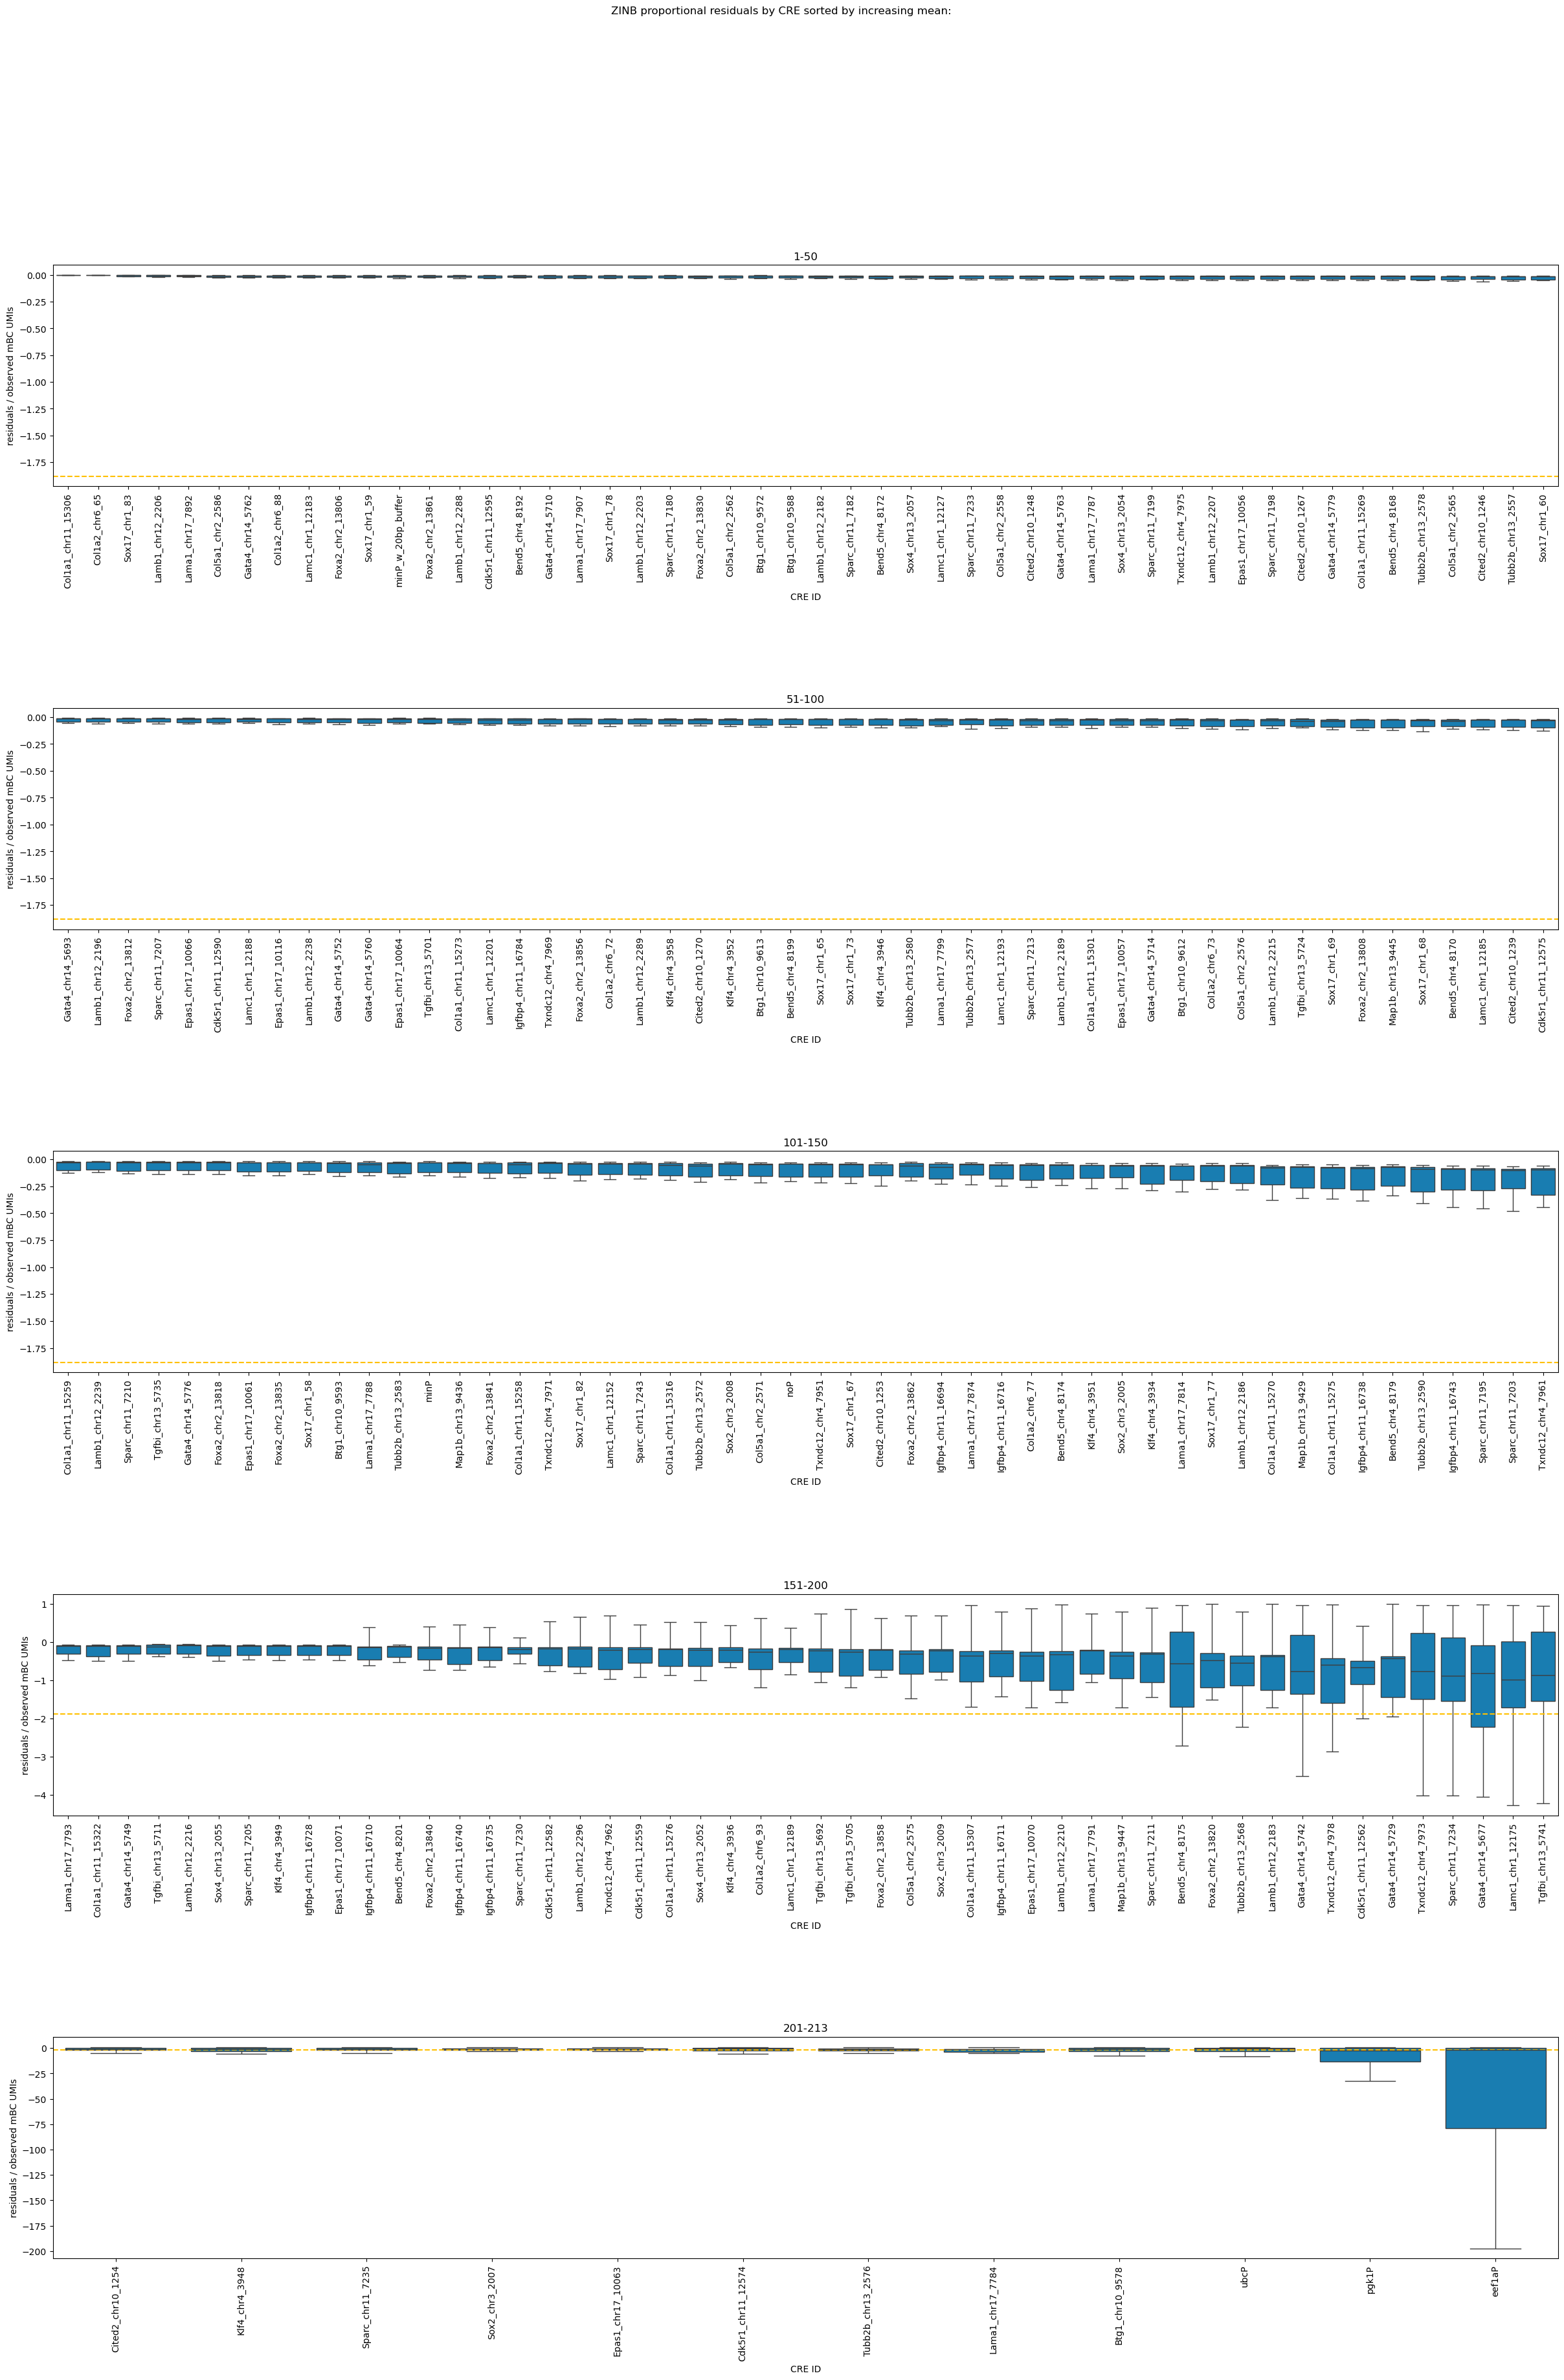

In [56]:
st = 'ZINB proportional residuals by CRE sorted by increasing mean:'
yl = 'residuals / observed mBC UMIs'
xl = 'CRE ID'
my = -1.883547
y = 'zinb_resnorm'
o = False
c = subplots_cre(st, yl, xl, my, y, o)

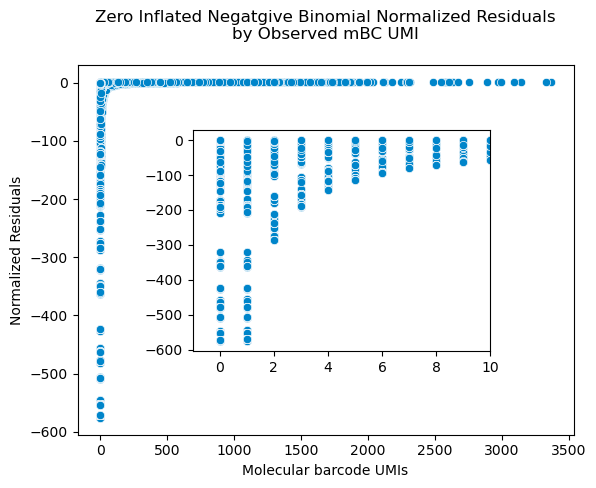

In [30]:
fig, ax = plt.subplots()
plt.title('Zero Inflated Negatgive Binomial Normalized Residuals\nby Observed mBC UMI\n')
plt.ylabel('Normalized Residuals')
plt.xlabel('Molecular barcode UMIs')
sns.scatterplot(data = preds, x = 'shendure_umis_mbc', y = 'zinb_resnorm', color=mcn_lightblue)

axins = inset_axes(ax,  "60%", "60%" ,loc="lower right", borderpad=6)
sns.scatterplot(data = preds, x = 'shendure_umis_mbc', y = 'zinb_resnorm', color=mcn_lightblue, ax = axins)
plt.xlim(-1,10)
plt.xlabel('')
plt.ylabel('')
plt.savefig("zinb_normed_residuals_over_shendure_mBC_UMIs.png", dpi=300)